<a href="https://colab.research.google.com/github/jonkstro/Challenges-LetsCode/blob/main/WebscrapingDigimon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/webscraping_digimon

/content/drive/MyDrive/Colab Notebooks/webscraping_digimon


In [1]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://digidb.io/digimon-list/'

pagina = requests.get(url)
print(pagina)

<Response [200]>


In [4]:
pagina = BeautifulSoup(pagina.content, 'html.parser')

print(type(pagina))

<class 'bs4.BeautifulSoup'>


In [10]:
df = pd.DataFrame()

rows = pagina.find_all('tr', class_='')
for td in rows:
  digimon_data = td.find_all('td')
  id = digimon_data[0].get_text() 
  img = digimon_data[1].find_all()[0]['src']
  digimon = digimon_data[1].get_text()
  estagio = digimon_data[2].get_text()
  tipo = digimon_data[3].get_text()
  atributo = digimon_data[4].get_text()
  memoria = digimon_data[5].get_text()
  slot = digimon_data[6].get_text()
  hp = digimon_data[7].get_text()
  sp = digimon_data[8].get_text()
  atk = digimon_data[9].get_text()
  defesa = digimon_data[10].get_text()
  intel = digimon_data[11].get_text()
  spd = digimon_data[12].get_text()
  
  # print(id, img, digimon, estagio, tipo, atributo, memoria, slot, hp, sp, atk, defesa, intel, spd)  
  # adicionar no dataframe:
  df = df.append({'ID': id, 
                   'IMAGEM': img, 
                   'DIGIMON': digimon, 
                   'ESTAGIO': estagio, 
                   'TIPO': tipo, 
                   'ATRIBUTO': atributo, 
                   'MEMORIA': memoria, 
                   'SLOT': slot, 
                   'HP': hp, 
                   'SP': sp, 
                   'ATAQUE': atk,
                   'DEFESA': defesa, 
                   'INTELIGENCIA': intel, 
                   'VELOCIDADE': spd}, ignore_index=True)

# df.head()
df.to_csv("tabela_digimons.csv",index=False)
print("="*15 + " | COLETA FINALIZADA | " + "="*15)

=============== | COLETA FINALIZADA | ===============


In [9]:
df.tail()

,ID,IMAGEM,DIGIMON,ESTAGIO,TIPO,ATRIBUTO,MEMORIA,SLOT,HP,SP,ATAQUE,DEFESA,INTELIGENCIA,VELOCIDADE
336,337,https://digidb.io/images/dot/dot901.png,Alphamon NX,Mega,Vaccine,Neutral,6,1,980,104,109,114,109,116
337,338,https://digidb.io/images/dot/dot902.png,Crusadermon NX,Mega,Virus,Dark,6,1,1030,100,118,99,109,121
338,339,https://digidb.io/images/dot/dot903.png,Leopardmon NX,Mega,Data,Light,6,1,960,109,112,91,116,126
339,340,https://digidb.io/images/dot/dot904.png,Omnimon NX,Mega,Vaccine,Light,6,1,1010,98,116,111,111,113
340,341,https://digidb.io/images/dot/dot905.png,Gallantmon NX,Mega,Virus,Light,6,1,1070,93,122,109,111,108


In [18]:
# analise dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            341 non-null    object
 1   IMAGEM        341 non-null    object
 2   DIGIMON       341 non-null    object
 3   ESTAGIO       341 non-null    object
 4   TIPO          341 non-null    object
 5   ATRIBUTO      341 non-null    object
 6   MEMORIA       341 non-null    int64 
 7   SLOT          341 non-null    int64 
 8   HP            341 non-null    int64 
 9   SP            341 non-null    int64 
 10  ATAQUE        341 non-null    int64 
 11  DEFESA        341 non-null    int64 
 12  INTELIGENCIA  341 non-null    int64 
 13  VELOCIDADE    341 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 37.4+ KB


In [17]:
# alterar os tipos das colunas numericas:

df['IMAGEM'] = df['IMAGEM'].astype('str')
df['DIGIMON'] = df['DIGIMON'].astype(str)
df['ESTAGIO'] = df['ESTAGIO'].astype(str)
df['TIPO'] = df['TIPO'].astype(str)
df['ATRIBUTO'] = df['ATRIBUTO'].astype(str)
df['MEMORIA'] = df['MEMORIA'].astype(int)
df['SLOT'] = df['SLOT'].astype(int)
df['HP'] = df['HP'].astype(int)
df['SP'] = df['SP'].astype(int)
df['ATAQUE'] = df['ATAQUE'].astype(int)
df['DEFESA'] = df['DEFESA'].astype(int)
df['INTELIGENCIA'] = df['INTELIGENCIA'].astype(int)
df['VELOCIDADE'] = df['VELOCIDADE'].astype(int)


In [23]:
# checar valores nulos e duplicados (é normal conter valores duplicados):
for col in df.columns:
  print(f'A coluna {col} contém {df[col].isnull().sum()} valores nulos')
  print(f'A coluna {col} contém {df[col].duplicated().sum()} valores duplicados')
  print("-" * 50)

A coluna ID contém 0 valores nulos
A coluna ID contém 0 valores duplicados
--------------------------------------------------
A coluna IMAGEM contém 0 valores nulos
A coluna IMAGEM contém 0 valores duplicados
--------------------------------------------------
A coluna DIGIMON contém 0 valores nulos
A coluna DIGIMON contém 0 valores duplicados
--------------------------------------------------
A coluna ESTAGIO contém 0 valores nulos
A coluna ESTAGIO contém 332 valores duplicados
--------------------------------------------------
A coluna TIPO contém 0 valores nulos
A coluna TIPO contém 337 valores duplicados
--------------------------------------------------
A coluna ATRIBUTO contém 0 valores nulos
A coluna ATRIBUTO contém 332 valores duplicados
--------------------------------------------------
A coluna MEMORIA contém 0 valores nulos
A coluna MEMORIA contém 327 valores duplicados
--------------------------------------------------
A coluna SLOT contém 0 valores nulos
A coluna SLOT conté

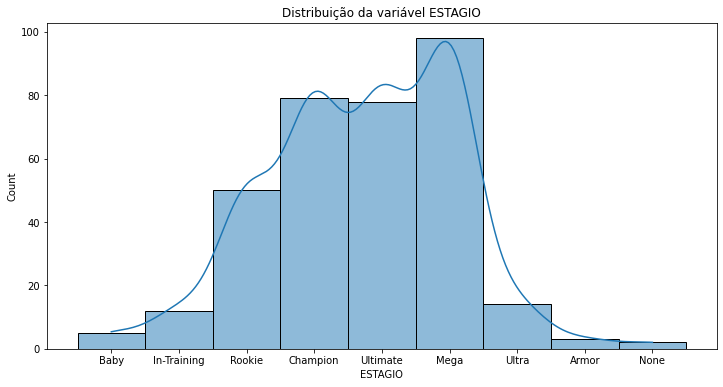

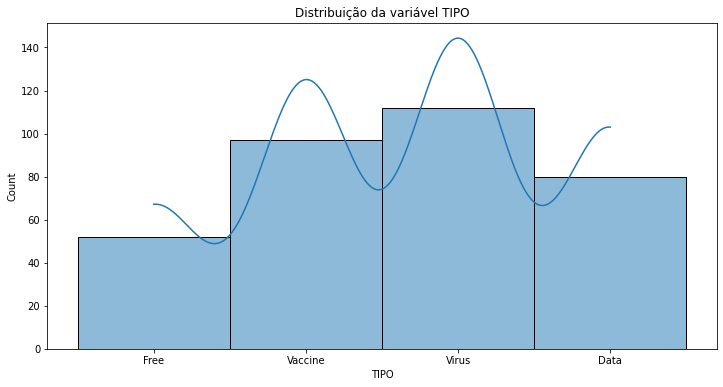

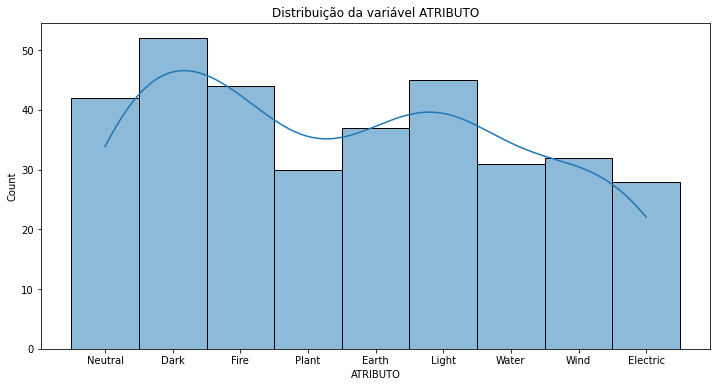

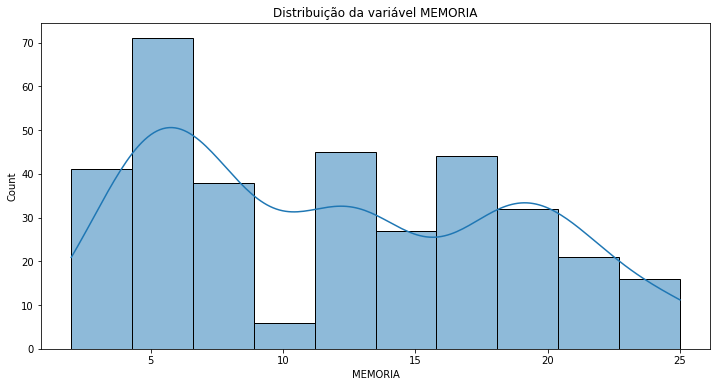

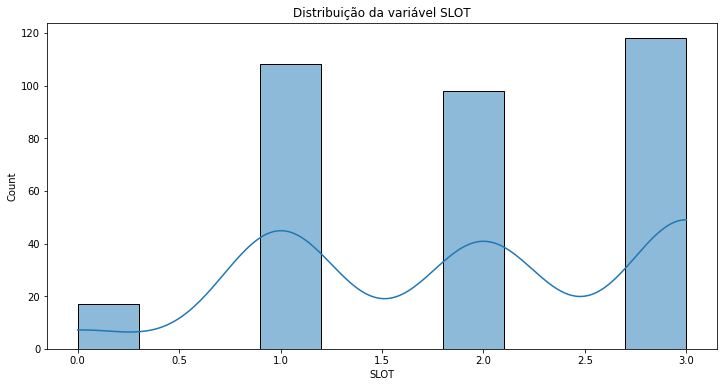

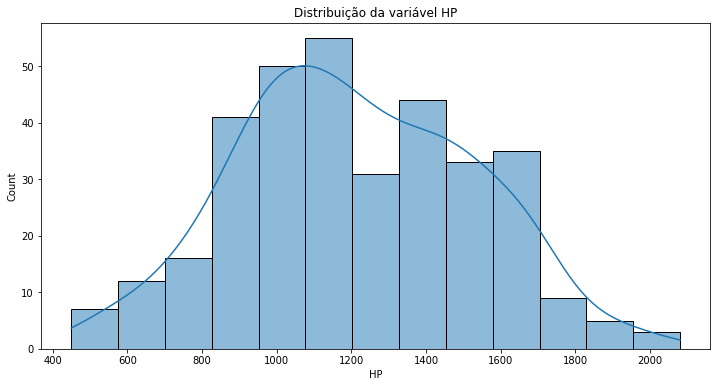

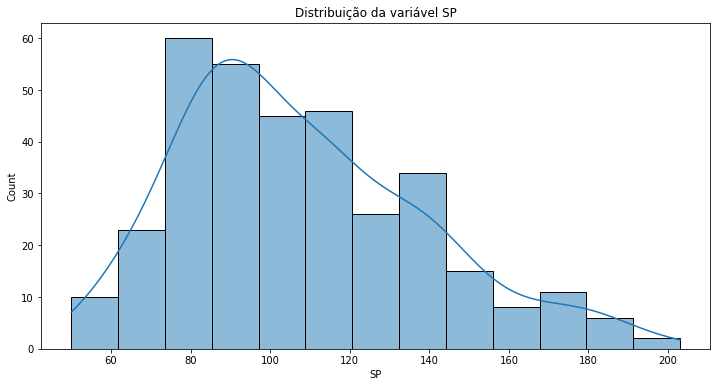

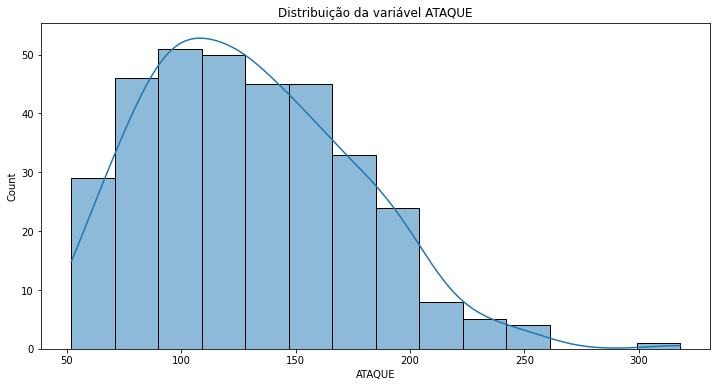

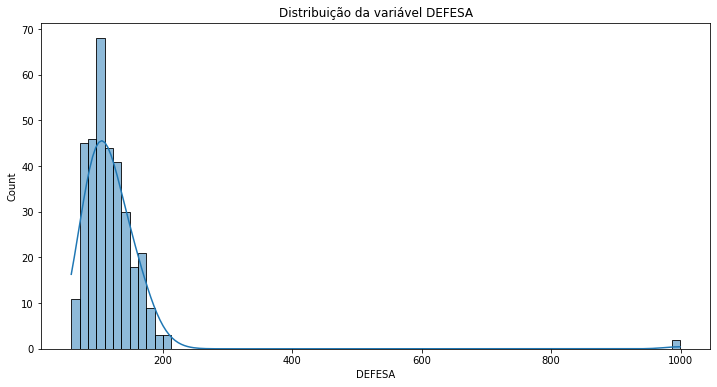

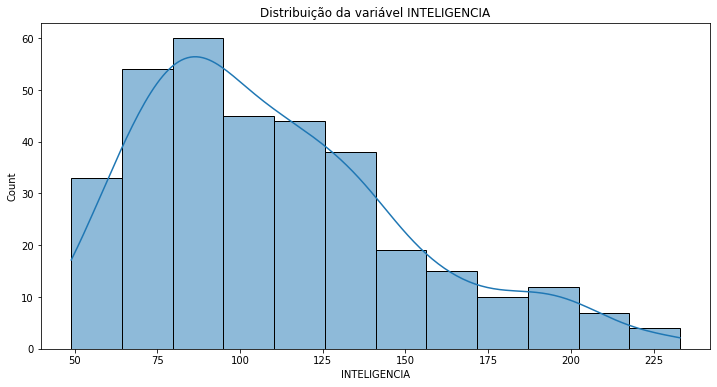

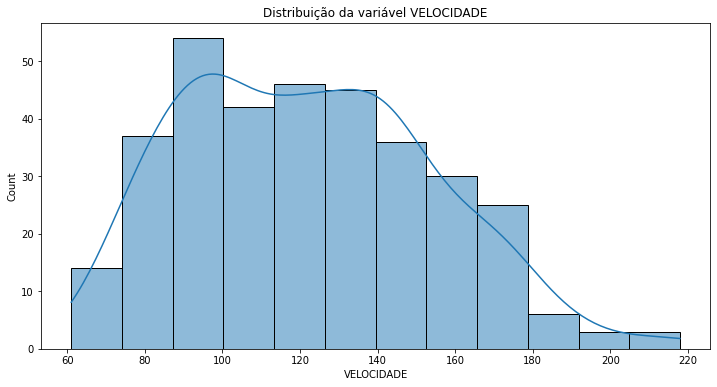

In [47]:
from matplotlib.pyplot import figure


for col in df.columns:
  if col == 'ID' or col == 'DIGIMON' or col == 'IMAGEM':
    continue
  else:
  # estudar a distribuição das variáveis numéricas (há um outlier de defesa):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x=col, kde=True).set_title(f"Distribuição da variável {col}")
    plt.show();

In [40]:
# mostrando os 5 maiores valores de defesa para encontrar os outliers:
## é possível observar que os maiores valores de defesa são de 2 digimons. 
df.sort_values(by=['DEFESA'], ascending=False)[0:5]

,ID,IMAGEM,DIGIMON,ESTAGIO,TIPO,ATRIBUTO,MEMORIA,SLOT,HP,SP,ATAQUE,DEFESA,INTELIGENCIA,VELOCIDADE
274,275,https://digidb.io/images/dot/dot069.png,PlatinumNumemon,Mega,Virus,Neutral,16,3,450,132,99,999,50,144
126,127,https://digidb.io/images/dot/dot752.png,PlatinumSukamon,Champion,Virus,Neutral,6,2,450,98,84,999,50,103
238,239,https://digidb.io/images/dot/dot704.png,GroundLocomon,Mega,Data,Electric,18,3,1140,114,144,213,133,128
323,324,https://digidb.io/images/dot/dot382.png,Magnamon,Armor,Free,Earth,22,2,1240,124,168,208,148,124
240,241,https://digidb.io/images/dot/dot734.png,Craniamon,Mega,Vaccine,Earth,22,1,1630,143,124,208,134,124
